In [1]:
import time
import numpy as np
from scipy import signal
from itertools import product
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [254]:
# Define functions
# Gaussian
def fct_Gauss(x,esp,var):
    return ((1./np.sqrt(var*2*np.pi))*np.exp(-0.5*(x-esp)**2/var))
# Gaussian - lambda dependant
# def var_lambda(wav):
#     return var*abs(np.sin(wav))
def fct_Gauss_bis(x,esp):
    a = 1000/150
    b = 5000 - a*500
    var_lambda = a*x + b
    return (1./np.sqrt(var_lambda*2*np.pi))*np.exp(-0.5*(x)**2/var_lambda)
# Delta
def delta(n):
    if n == 0:
        return 1
    else:
         return 0
# Convolution
def convolution(a,b):
    conv = []
    for i in range(len(a)):          # open a loop covering a sufficient range 
        somme = 0                    # set to zero
        for j in range(len(b)):      #  
            somme += a[i-j]*b[j]     # sum the nonzero overlap terms
        conv.append(somme)
    return conv

def convolution_bis(a,b):
    conv = []
    N = len(a)
    M = len(b)
#    if len(a) == len(b):
    for i in range(N):
        somme = 0                  #  
        for j in range(-M,M):      # 
            if j<0:
                somme += 0
            else:
                somme += a[i-j]*b[j] #
        conv.append(somme)
    return conv

def conv_liste(a,b):
    N = len(a)
    M = len(b)
    k = np.arange(1-N,N+M-1)         # set k starts from 
    for i in k:
        a[::i][-1]

In [157]:
# FHWM = np.sqrt(8*np.log(2)) * sigma = np.sqrt(8*np.log(2)*variance)

Amplitude: [1 1 1 1 1 1 1 1 1 1]
Distance: [ 0 10 20 30 40 50 60 70 80 90]


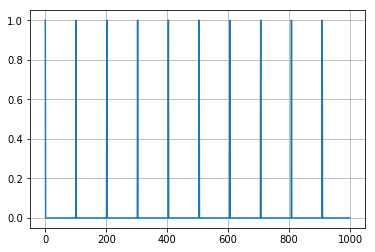

In [256]:
fi = []
n = 100
n_pic = 10

amp = np.ones(n_pic,dtype=int)
dis = np.arange(0,n,n_pic)

for i,j in product(range(n),range(n_pic)):
    fi.append(amp[j]*delta(i-dis[j]))

print('Amplitude:', amp)
print('Distance:', dis)

plt.figure()
plt.plot(fi)
plt.grid(True)

module: 11.42440390586853
constant variance: 8488.015804052353


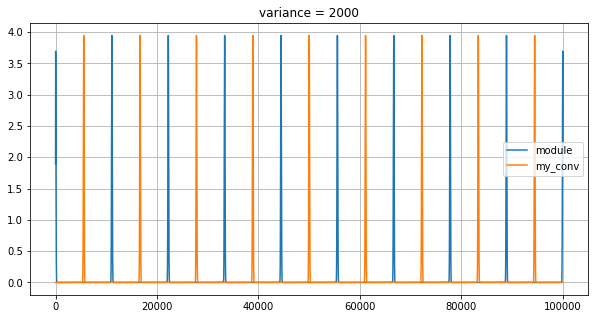

In [299]:
variance = 100
esperance = len(fi)/2
x = np.arange(0,len(fi),1)
#convolve by using module
start = time. time()
fo_module = np.convolve(fi, fct_Gauss(x,esperance,variance),mode='same')
#fo_bis = np.convolve(fi,fct_Gauss_bis(x,esperance),mode='same')
end = time. time()
print('module:',end - start)
# convolve by using self defined function
start = time. time()
fo_1 = convolution(fi, fct_Gauss(x,esperance,variance))
#fo_1b = convolution_bis(fi, fct_Gauss(x,esperance,variance))
end = time. time()
print('constant variance:',end - start)
# variance depend du lambda
# start = time. time()
# x_wav = np.linspace(350.0,850.0,1000)
# fo_2 = convolution(fi, fct_Gauss_bis(x,esperance,variance,var_lambda(variance,x_wav)))
# #fo_2b = convolution_bis(fi, fct_Gauss_bis(x,esperance,variance,var_lambda(variance,x_wav)))
# end = time. time()
# print('var(lambda):',end - start)

plt.figure(figsize=[10,5])
plt.plot(fo_module,label='module')
#plt.plot(fo_bis,label='variance(lambda)')
plt.plot(fo_1,label='my_conv')
#plt.plot(fo_2,label='variance(lambda)')
plt.title('variance = 2000')
plt.legend()
plt.grid(True)
plt.show()

In [154]:
result_fi = integrate.trapz(fi)
result_fo0 = integrate.trapz(fo_module)
result_fo1 = integrate.trapz(fo_1)
result_fo2 = integrate.trapz(fo_2)
print ('Dirac:',result_fi)
print ('modul:',result_fo0)
print ('var_c:',result_fo1)
print ('var_l:',result_fo2)

Dirac: 9.5
modul: 9.539794741393923
var_c: 9.965735503517195
var_l: 9.457644024827442


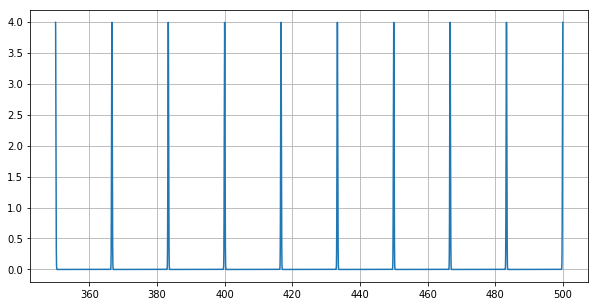

In [283]:
# Create a very narrow Gaussian incoming signal
variance = 0.01 # start with a fixed variance
n = 100000 # many steps to make the gaussian extremly narrow
n_pic = 10 # number of peaks in the signal
wavelength = np.linspace(350,500,n)
distance = np.linspace(350,500,n_pic)
fi = np.zeros(n)
for i in distance:
    fi += fct_Gauss(wavelength,i,variance) 
plt.figure(figsize=[10,5])
plt.plot(wavelength,fi)
plt.grid(True)

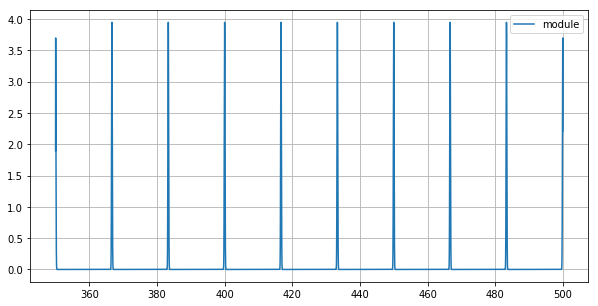

In [288]:
esperance = (500+350)/2
f_conv = fct_Gauss(wavelength,esperance,variance*100000)
res_conv = np.convolve(fi, f_conv, mode='same')
plt.figure(figsize=[10,5])
plt.plot(wavelength,fo_module,label='module')
plt.legend()
plt.grid(True)
plt.show()

0.0032190938096908635 0.003215106577118543
1.9457951481816396e-88 1.2546126158952655e-88
0.7364475226971315
0.9999706872035284


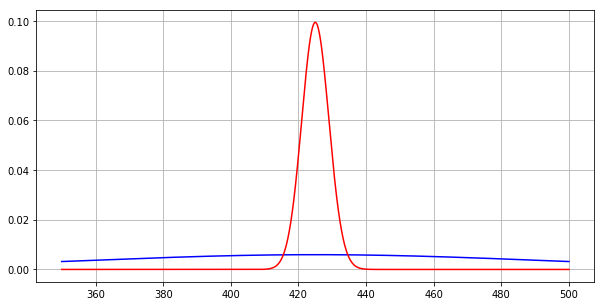

In [291]:
R = np.linspace(4000,5000,n)
a = 1/0.15
b =  5000 - a*500
esperance = (500+350)/2
# instead of a variable, comparing to fv, replaced wavelength with a fixed esperance
fv1 = fct_Gauss(wavelength,esperance,(a*esperance + b))


# by using R=λ/dλ, dλ is known for every λ
dLam = wavelength/R   # width / FHWM?
sig = dLam / np.sqrt(8*np.log(2))
variance = (sig)**2*10000 # only multiple 10000 to see how much it takes to scale, (???)
fv2 = fct_Gauss(wavelength,esperance,variance) #np.exp(-0.5*(wavelength-esperance)**2/variance)
plt.figure(figsize=[10,5])
plt.plot(wavelength,fv1,'b')
plt.plot(wavelength,fv2,'r')
plt.grid(True)

print(fv1[450],fv1[400])
print(fv2[450],fv2[400])
print(np.trapz(fv1,wavelength))
print(np.trapz(fv2,wavelength))

it takes 0.03948640823364258 seconds
2.533874990666737e-39 2.1062956380257737e-39
1.0


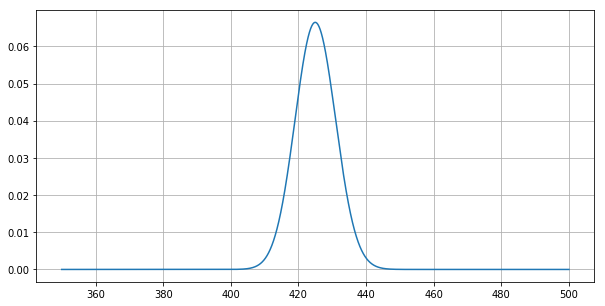

In [290]:
start = time. time()
cste = 0.008      # this is a constant to scale the variance
a = 1/0.15        # given by the linear relation of lambda and R
b =  5000 - a*500 # a and b are the fixed parameters of the slope

esperance = (500+350)/2
fv = fct_Gauss(wavelength,esperance,cste*(a*wavelength + b))
plt.figure(figsize=[10,5])
plt.plot(wavelength,fv)
plt.grid(True)
end = time. time()
print('it takes',end - start,'seconds')

print(fv[450],fv[400])

print(np.trapz(fv,wavelength))

module: 17.85413932800293


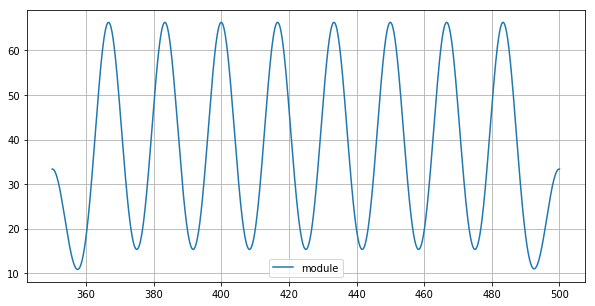

In [292]:
start = time. time()
fo_module = np.convolve(fi, fv2,mode='same')
end = time. time()
print('module:',end - start)
plt.figure(figsize=[10,5])
plt.plot(wavelength,fo_module,label='module')
plt.legend()
plt.grid(True)
plt.show()

In [293]:
FWHM = wavelength[np.where(fv>=np.max(fv)/2.)[0][-1]] - wavelength[np.where(fv>=np.max(fv)/2.)[0][0]]
print ('FWHM =', FWHM)

FWHM = 14.127141271412711


In [298]:
res_conv = np.zeros(n)
for i in range(n):
    res_conv = fi[i]*fct_Gauss(wavelength,wavelength[i],(wavelength[i]/(R[i]*np.sqrt(8*np.log(2))))**2)


KeyboardInterrupt: 

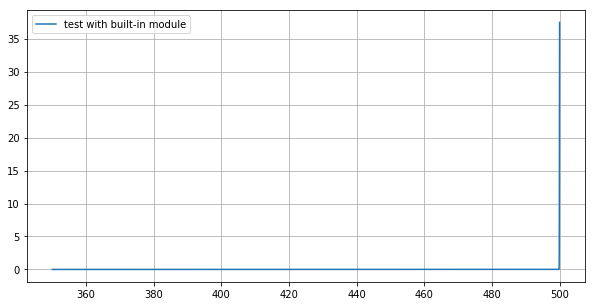

In [297]:
plt.figure(figsize=[10,5])
plt.plot(wavelength,res_conv,label='test with built-in module')
plt.legend()
plt.grid(True)
plt.show()

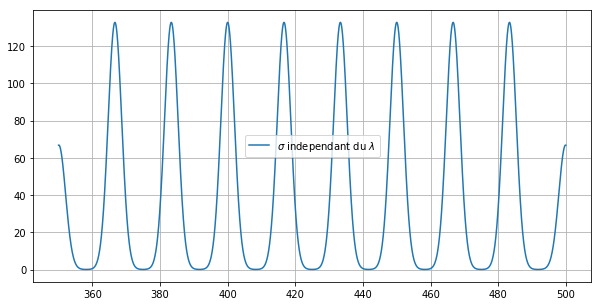

Time used: 858.9319114685059


In [300]:
start = time. time()
R = np.linspace(4000,5000,n)

res = np.zeros(n)
for i in range(n):
    sigma = 2
    fv = fct_Gauss(wavelength,wavelength[i],sigma**2)
    res += fi[i]*fv

plt.figure(figsize=[10,5])
plt.plot(wavelength,res,label='$\sigma$ independant du $\lambda$')
plt.legend()
plt.grid(True)
plt.show()

end = time. time()
print('Time used:',end - start)